In [1]:
import pandas as pd


In [2]:
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [3]:
#load titanic dataset
df = pd.read_csv('/kaggle/input/titanic/train.csv')

#view a few rows of the data set
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
#view general info about dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


**Detecting and Cleaning Missing Data**

In [5]:
#view missing data in columns,'sum()'is check the total missing data
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
#fill the nan values on the Age column with median 
df['Age'].fillna(df['Age'].mean(), inplace=True)

#check the missing values again
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
#view the missing data rate in the Cabin column
missing_ratio = df['Cabin'].isnull().sum()/len(df)
print(f"Missing data rate in Cabin column: {missing_ratio:.2%}")

Missing data rate in Cabin column: 77.10%


In [8]:
#If the missing data rate is very high (such as over 60-70%)
#fill missing data with unknown
df['Cabin'].fillna('Unkown', inplace=True)

print(df['Cabin'].isnull().sum())

0


**Data Visualization**

In [9]:
import seaborn as sns 
import matplotlib.pyplot as plt

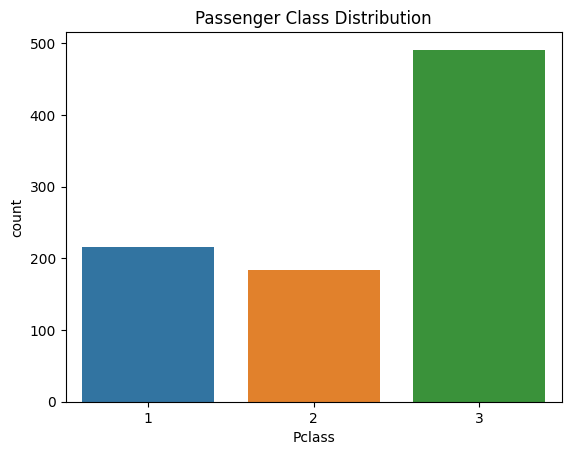

In [10]:
#visualize the passenger class (Pclass) distribution
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')
plt.show()


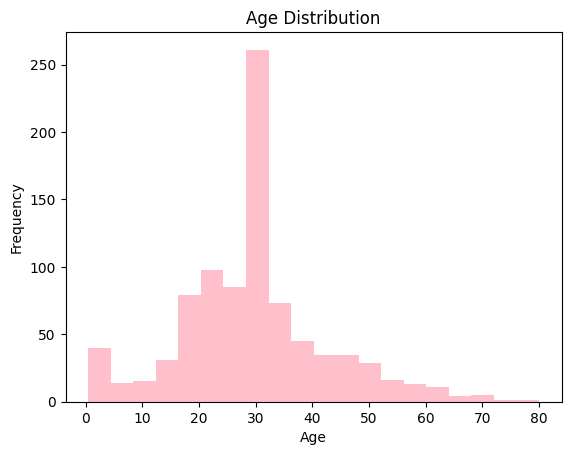

In [11]:
## Plot histogram of age column
df['Age'].plot(kind='hist', bins=20, title = 'Age Distribution', color='pink')
plt.xlabel('Age')
plt.show()

**Simple Analyzes**

In [12]:
#Calculate the survival rate according to the Survived column
survival_rate = df['Survived'].mean()
print(f"Survival Rate: {survival_rate:.2%}")

Survival Rate: 38.38%


In [13]:
#Calculate the survival rate according to class
class_survival_rate= df.groupby('Pclass')['Survived'].mean()
print(class_survival_rate)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [14]:
# fare divide the fare column into three groups
df['Fare_Group'] = pd.cut(df['Fare'], bins=[14, 28, 42, 56], labels=['Low', 'Medium', 'High'])

# calculate the survival rate in each fare group
fare_death_rate = df.groupby('Fare_Group', observed=False)['Survived'].apply(lambda x: 1 - x.mean())
print(fare_death_rate)

Fare_Group
Low       0.569307
Medium    0.587500
High      0.527778
Name: Survived, dtype: float64
